- Nama : Fahma Zuaf Zarir
- NIM : 23611054

# Bagian I: Pengumpulan dan Persiapan data 

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read dataset
data_sma = pd.read_csv("D:\\Tugas Kuliah Semester 4\\Modern Prediction & Machine Learning (3 SKS)\\UTS MPML\\Data\\Jumlah Sekolah,Guru,Murid SMA Menurut Kecamatan di DIY 2023_2024.csv")
data_pdrb = pd.read_csv("D:\\Tugas Kuliah Semester 4\\Modern Prediction & Machine Learning (3 SKS)\\UTS MPML\\Data\\PDRB_per_Kapita_Atas_Dasar_Harga_Konstan_2010_Menurut_Kabupaten_Kota_diProvinsi_DIY_ribu rupiah, 2024.csv")
print(data_pdrb.info())
print(data_sma.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Kabupaten/Kota                                          5 non-null      object
 1   Produk Domestik Regional Bruto per Kapita HK (Ribu Rp)  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Kabupaten                           78 non-null     object
 1   Kecamatan                           78 non-null     object
 2   Jumlah Sekolah SMA (Negeri)         78 non-null     object
 3   Jumlah Sekolah SMA (Swasta)         78 non-null     object
 4   Jumlah Sekol

In [3]:
# Replace '-' with 0 and convert columns 2 to 10 to integer
columns_to_convert = data_sma.columns[2:11]
data_sma[columns_to_convert] = data_sma[columns_to_convert].replace('-', 0).astype('int64')
print(data_sma.dtypes)

Kabupaten                             object
Kecamatan                             object
Jumlah Sekolah SMA (Negeri)            int64
Jumlah Sekolah SMA (Swasta)            int64
Jumlah Sekolah SMA (Negeri+Swasta)     int64
Jumlah Guru SMA (Negeri)               int64
Jumlah Guru SMA (Swasta)               int64
Jumlah Guru SMA (Negeri+Swasta)        int64
Jumlah Murid SMA (Negeri)              int64
Jumlah Murid SMA (Swasta)              int64
Jumlah Murid SMA (Negeri+Swasta)       int64
dtype: object


In [4]:
data_sma.describe()

,Jumlah Sekolah SMA (Negeri),Jumlah Sekolah SMA (Swasta),Jumlah Sekolah SMA (Negeri+Swasta),Jumlah Guru SMA (Negeri),Jumlah Guru SMA (Swasta),Jumlah Guru SMA (Negeri+Swasta),Jumlah Murid SMA (Negeri),Jumlah Murid SMA (Swasta),Jumlah Murid SMA (Negeri+Swasta)
count,78.000000,78.000000,78.00000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,0.884615,1.358974,2.24359,32.923077,19.948718,52.871795,564.833333,239.512821,804.346154
std,0.664123,1.728105,2.04613,29.441013,33.333770,54.182318,520.950366,496.805268,862.970479
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,1.00000,4.250000,0.000000,20.500000,30.000000,0.000000,293.750000
50%,1.000000,1.000000,1.00000,30.000000,5.500000,36.000000,528.000000,37.500000,554.000000
75%,1.000000,2.000000,3.75000,44.750000,22.000000,74.000000,755.000000,218.500000,1038.500000
max,3.000000,8.000000,9.00000,140.000000,179.000000,319.000000,2467.000000,2522.000000,4888.000000


In [5]:
jumlah_sma_per_kabupaten = data_sma.groupby('Kabupaten')['Jumlah Sekolah SMA (Negeri+Swasta)'].sum()
print(jumlah_sma_per_kabupaten)
print("Jumlah Sekolah SMA di Provinsi DIY Tahun 2024:",sum(jumlah_sma_per_kabupaten))

Kabupaten
Bantul             37
Gunung Kidul       24
Kota Yogyakarta    42
Kulon Progo        17
Sleman             55
Name: Jumlah Sekolah SMA (Negeri+Swasta), dtype: int64
Jumlah Sekolah SMA di Provinsi DIY Tahun 2024: 175


In [6]:
jumlah_gurusma = data_sma.groupby('Kabupaten')['Jumlah Guru SMA (Negeri+Swasta)'].sum()
print(jumlah_gurusma)
print("Jumlah Guru SMA di Provinsi DIY Tahun 2024:",sum(jumlah_gurusma))

Kabupaten
Bantul              973
Gunung Kidul        493
Kota Yogyakarta    1177
Kulon Progo         399
Sleman             1082
Name: Jumlah Guru SMA (Negeri+Swasta), dtype: int64
Jumlah Guru SMA di Provinsi DIY Tahun 2024: 4124


In [7]:
jumlah_muridsma = data_sma.groupby('Kabupaten')['Jumlah Murid SMA (Negeri+Swasta)'].sum()
print(jumlah_muridsma)
print("Jumlah Murid SMA di Provinsi DIY Tahun 2024:",sum(jumlah_muridsma))

Kabupaten
Bantul             15512
Gunung Kidul        7784
Kota Yogyakarta    17690
Kulon Progo         5436
Sleman             16317
Name: Jumlah Murid SMA (Negeri+Swasta), dtype: int64
Jumlah Murid SMA di Provinsi DIY Tahun 2024: 62739


In [8]:
data_pdrb.describe()
# Check for missing values  
print(data_pdrb.isnull().sum())
# Check for duplicates  
print(data_pdrb.duplicated().sum())

Kabupaten/Kota                                            0
Produk Domestik Regional Bruto per Kapita HK (Ribu Rp)    0
dtype: int64
0


# Bagian II: Clustering 

## Herarchical Clustering

Checking Distribution

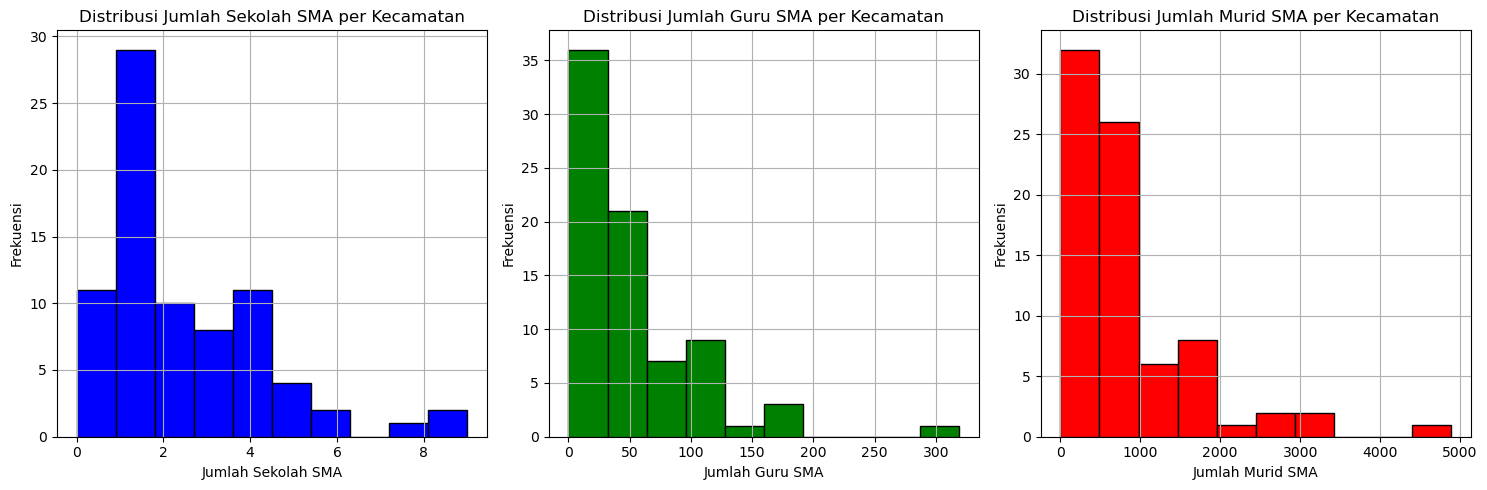

In [10]:
# Visualisasi distribusi jumlah murid, guru, dan sekolah SMA per kecamatan
plt.figure(figsize=(15, 5))

# Distribusi jumlah sekolah SMA
plt.subplot(1, 3, 1)
plt.hist(data_sma['Jumlah Sekolah SMA (Negeri+Swasta)'], bins=10, color='blue', edgecolor='k')
plt.title("Distribusi Jumlah Sekolah SMA per Kecamatan", fontsize=12)
plt.xlabel("Jumlah Sekolah SMA", fontsize=10)
plt.ylabel("Frekuensi", fontsize=10)
plt.grid(True)

# Distribusi jumlah guru SMA
plt.subplot(1, 3, 2)
plt.hist(data_sma['Jumlah Guru SMA (Negeri+Swasta)'], bins=10, color='green', edgecolor='k')
plt.title("Distribusi Jumlah Guru SMA per Kecamatan", fontsize=12)
plt.xlabel("Jumlah Guru SMA", fontsize=10)
plt.ylabel("Frekuensi", fontsize=10)
plt.grid(True)

# Distribusi jumlah murid SMA
plt.subplot(1, 3, 3)
plt.hist(data_sma['Jumlah Murid SMA (Negeri+Swasta)'], bins=10, color='red', edgecolor='k')
plt.title("Distribusi Jumlah Murid SMA per Kecamatan", fontsize=12)
plt.xlabel("Jumlah Murid SMA", fontsize=10)
plt.ylabel("Frekuensi", fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

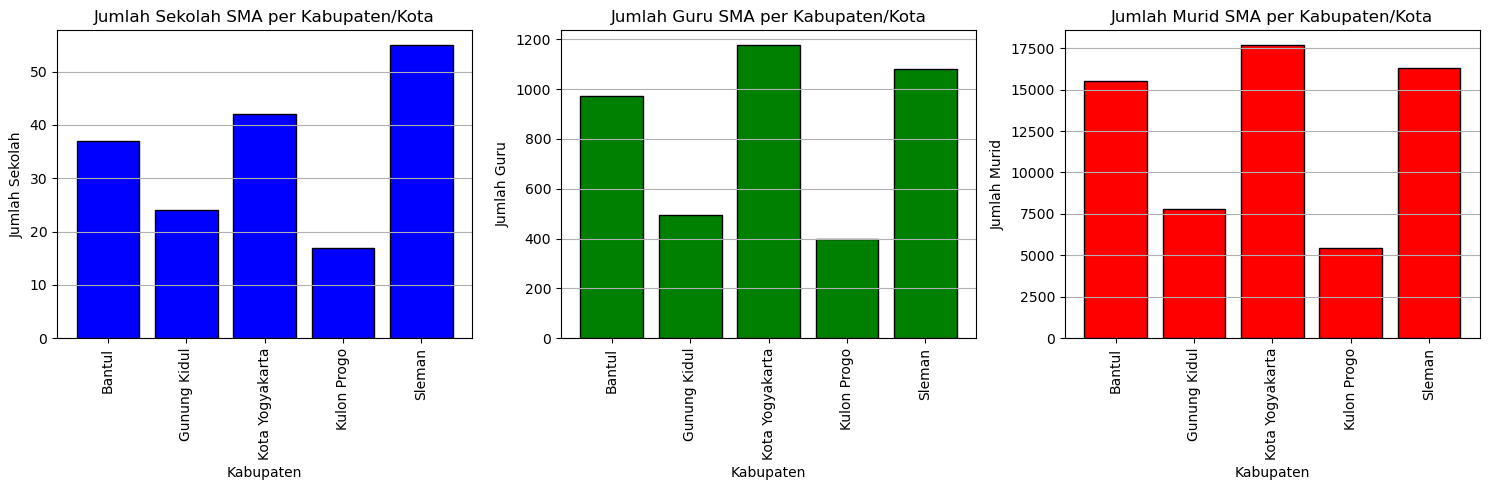

In [13]:
# Visualisasi jumlah sekolah, guru, dan murid SMA per kabupaten
plt.figure(figsize=(15, 5))

# Bar plot jumlah sekolah SMA
plt.subplot(1, 3, 1)
jumlah_sma_per_kabupaten.plot(kind='bar', color='blue', edgecolor='k', width=0.8)
plt.title("Jumlah Sekolah SMA per Kabupaten/Kota", fontsize=12)
plt.xlabel("Kabupaten", fontsize=10)
plt.ylabel("Jumlah Sekolah", fontsize=10)
plt.grid(axis='y')

# Bar plot jumlah guru SMA
plt.subplot(1, 3, 2)
jumlah_gurusma.plot(kind='bar', color='green', edgecolor='k', width=0.8)
plt.title("Jumlah Guru SMA per Kabupaten/Kota", fontsize=12)
plt.xlabel("Kabupaten", fontsize=10)
plt.ylabel("Jumlah Guru", fontsize=10)
plt.grid(axis='y')

# Bar plot jumlah murid SMA
plt.subplot(1, 3, 3)
jumlah_muridsma.plot(kind='bar', color='red', edgecolor='k', width=0.8)
plt.title("Jumlah Murid SMA per Kabupaten/Kota", fontsize=12)
plt.xlabel("Kabupaten", fontsize=10)
plt.ylabel("Jumlah Murid", fontsize=10)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

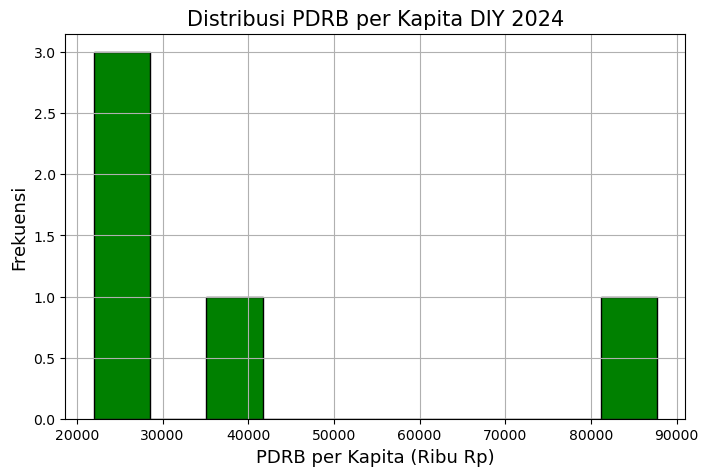

In [14]:
plt.figure(figsize=(8, 5))
plt.title("Distribusi PDRB per Kapita DIY 2024", fontsize=15)
plt.xlabel("PDRB per Kapita (Ribu Rp)", fontsize=13)
plt.ylabel("Frekuensi", fontsize=13)
plt.grid(True)
plt.hist(data_pdrb['Produk Domestik Regional Bruto per Kapita HK (Ribu Rp)'], color='green', edgecolor='k')
plt.show()

Korelasi antara PDRB per Kapita dan variabel SMA:
Jumlah Sekolah SMA    0.418343
Jumlah Guru SMA       0.652465
Jumlah Murid SMA      0.609245
Name: PDRB per Kapita, dtype: float64


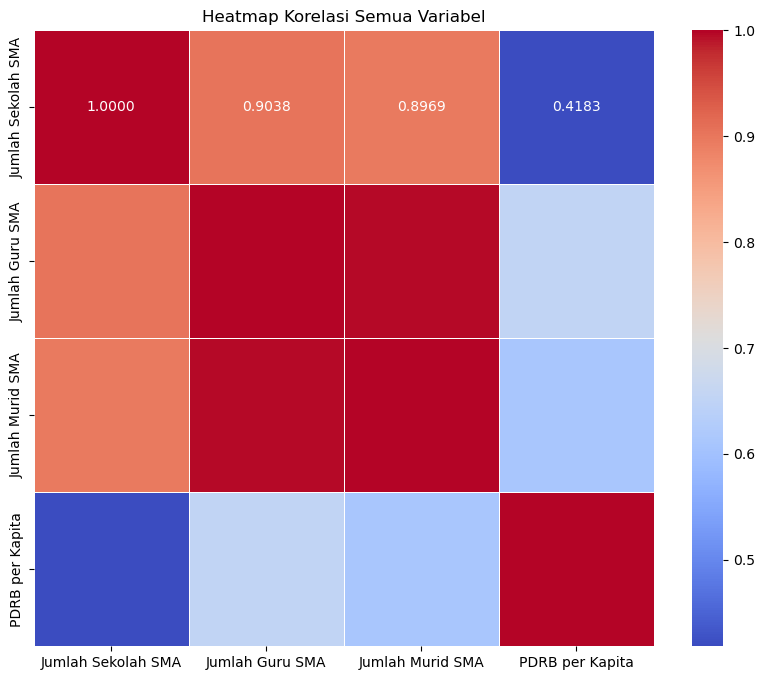

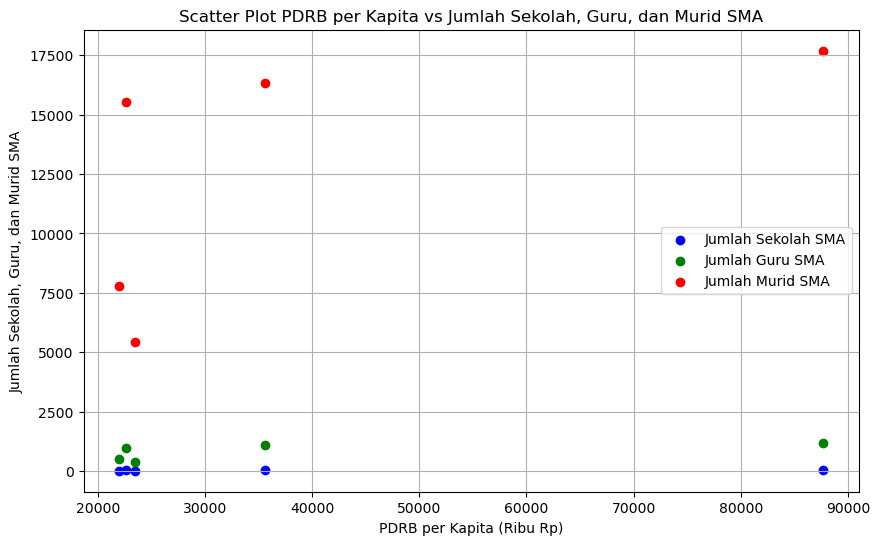

In [36]:
# Gabungkan data yang relevan untuk clustering jika belum ada
if 'combined_data' not in locals():
    combined_data = pd.DataFrame({
        'Jumlah Sekolah SMA': jumlah_sma_per_kabupaten,
        'Jumlah Guru SMA': jumlah_gurusma,
        'Jumlah Murid SMA': jumlah_muridsma,
        'PDRB per Kapita': data_pdrb.set_index('Kabupaten/Kota')['Produk Domestik Regional Bruto per Kapita HK (Ribu Rp)']
    })

# Hitung korelasi
correlation = combined_data.corr()

# Tampilkan korelasi antara PDRB per Kapita dan variabel SMA
print("Korelasi antara PDRB per Kapita dan variabel SMA:")
print(correlation.loc[['Jumlah Sekolah SMA', 'Jumlah Guru SMA', 'Jumlah Murid SMA'], 'PDRB per Kapita'])

# Visualisasi korelasi dengan angka untuk semua variabel
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5, annot_kws={"size": 10}, square=False)
plt.title("Heatmap Korelasi Semua Variabel")
plt.show()

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['PDRB per Kapita'], combined_data['Jumlah Sekolah SMA'], color='blue', label='Jumlah Sekolah SMA')
plt.scatter(combined_data['PDRB per Kapita'], combined_data['Jumlah Guru SMA'], color='green', label='Jumlah Guru SMA')
plt.scatter(combined_data['PDRB per Kapita'], combined_data['Jumlah Murid SMA'], color='red', label='Jumlah Murid SMA')
plt.title("Scatter Plot PDRB per Kapita vs Jumlah Sekolah, Guru, dan Murid SMA")
plt.xlabel("PDRB per Kapita (Ribu Rp)")
plt.ylabel("Jumlah Sekolah, Guru, dan Murid SMA")
plt.legend()
plt.grid(True)
plt.show()


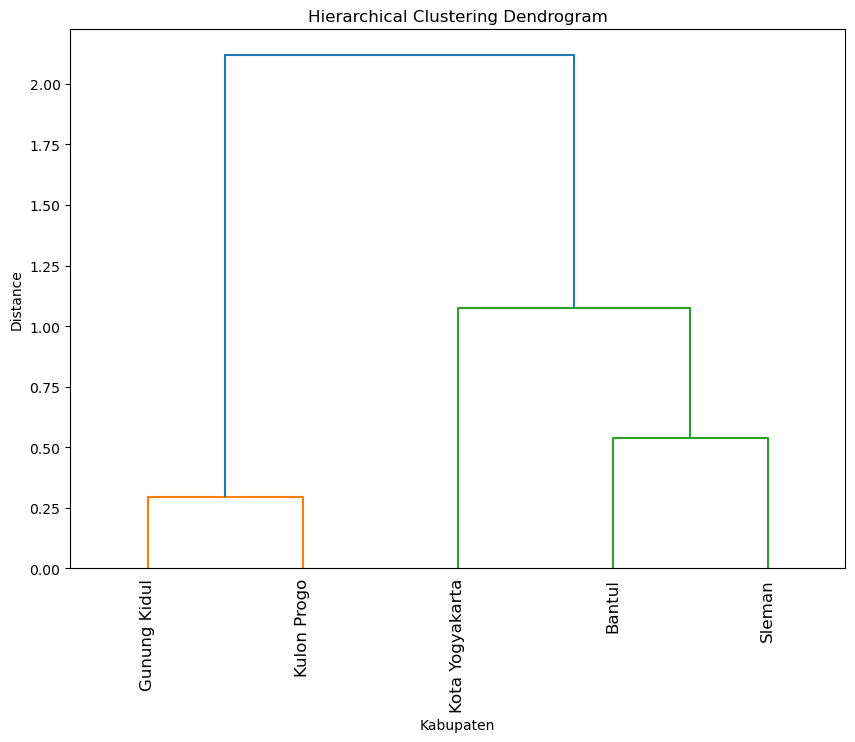

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler

# Pastikan scaler sudah diinisialisasi sebelumnya
scaler = MinMaxScaler()

# Gabungkan data yang relevan untuk clustering
combined_data = pd.DataFrame({
    'Jumlah Sekolah SMA': jumlah_sma_per_kabupaten,
    'Jumlah Guru SMA': jumlah_gurusma,
    'Jumlah Murid SMA': jumlah_muridsma,
    'PDRB per Kapita': data_pdrb.set_index('Kabupaten/Kota')['Produk Domestik Regional Bruto per Kapita HK (Ribu Rp)']
})

# Standardize the data using MinMaxScaler
scaled_data = scaler.fit_transform(combined_data)

# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=combined_data.index, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Kabupaten')
plt.ylabel('Distance')
plt.show()


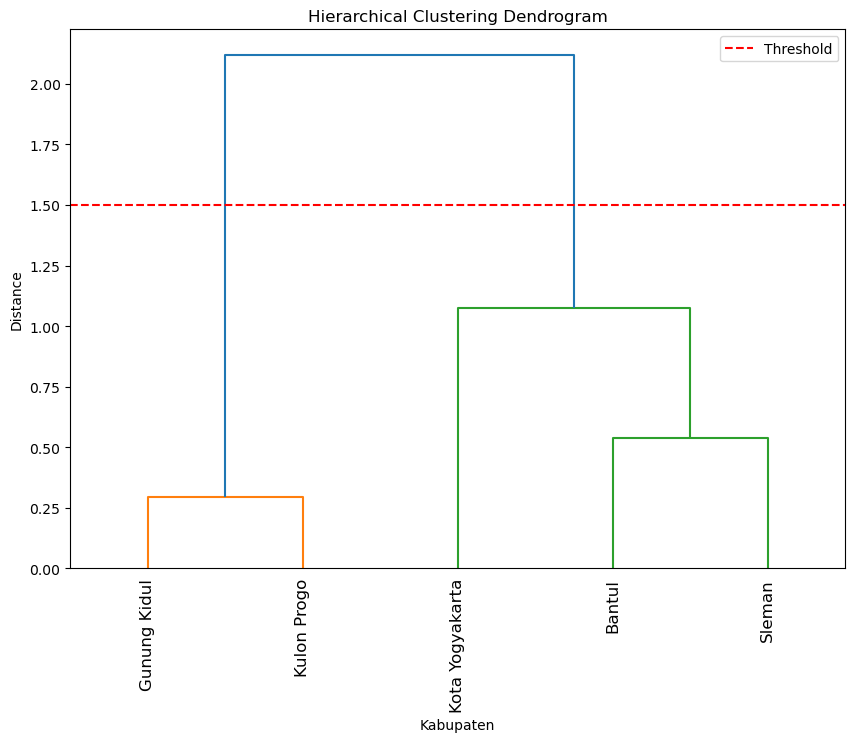

In [23]:
# Tambahkan garis horizontal pada dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=combined_data.index, leaf_rotation=90)
plt.axhline(y=1.5, color='r', linestyle='--', label='Threshold')  # Tambahkan garis horizontal
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Kabupaten')
plt.ylabel('Distance')
plt.legend()
plt.show()

### Penjelasan Dendrogram

Dendrogram adalah representasi visual dari proses hierarchical clustering. Pada dendrogram yang dihasilkan, setiap titik data (dalam hal ini kabupaten/kota) awalnya dianggap sebagai cluster individu. Kemudian, cluster yang paling mirip (berdasarkan jarak atau kemiripan) digabungkan secara iteratif hingga semua data berada dalam satu cluster.

#### Komponen Dendrogram:
1. **Sumbu X**: Menampilkan label data (nama kabupaten/kota) yang dikelompokkan.
2. **Sumbu Y**: Menunjukkan jarak atau tingkat kemiripan antara cluster yang digabungkan. Semakin rendah nilai pada sumbu Y, semakin mirip cluster yang digabungkan.
3. **Garis Horizontal**: Menunjukkan penggabungan cluster. Semakin tinggi garis horizontal, semakin besar jarak atau perbedaan antara cluster yang digabungkan.
4. **Garis Vertikal**: Menghubungkan data atau cluster yang digabungkan.

#### Interpretasi Dendrogram:
- Pada dendrogram ini, kabupaten/kota yang lebih mirip (berdasarkan variabel seperti jumlah sekolah, guru, murid SMA, dan PDRB per kapita) akan digabungkan lebih awal (garis horizontal lebih rendah).
- Misalnya, jika dua kabupaten memiliki garis horizontal yang sangat rendah, itu berarti mereka memiliki karakteristik yang sangat mirip.
- Tinggi garis horizontal yang menghubungkan cluster menunjukkan tingkat perbedaan antara cluster. Semakin tinggi garisnya, semakin besar perbedaan antara cluster yang digabungkan.

#### Contoh:
- Dari dendrogram, kita dapat melihat bahwa kabupaten seperti **Gunung Kidul** dan **Kulon Progo** mungkin digabungkan lebih awal karena memiliki karakteristik yang mirip (misalnya, jumlah sekolah, guru, murid SMA, dan PDRB per kapita yang relatif rendah).
- Sebaliknya, **Kota Yogyakarta** mungkin digabungkan di tahap akhir karena memiliki karakteristik yang berbeda secara signifikan (misalnya, PDRB per kapita yang jauh lebih tinggi).

Dendrogram ini membantu kita memahami struktur hierarki dan hubungan antar cluster sebelum menentukan jumlah cluster yang optimal untuk analisis lebih lanjut.


## K-Means Clustering

In [24]:
from sklearn.cluster import KMeans

# Pilih kolom yang relevan untuk clustering
data_kecamatan = data_sma[['Jumlah Sekolah SMA (Negeri+Swasta)', 'Jumlah Guru SMA (Negeri+Swasta)', 'Jumlah Murid SMA (Negeri+Swasta)']]

# Standarisasi data menggunakan MinMaxScaler
scaled_kecamatan_data = scaler.fit_transform(data_kecamatan)

# Lakukan clustering menggunakan K-Means
kmeans_kecamatan = KMeans(n_clusters=3, random_state=42)
data_sma['Cluster'] = kmeans_kecamatan.fit_predict(scaled_kecamatan_data)

# Tampilkan hasil clustering
print(data_sma[['Kecamatan', 'Cluster']])


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


        Kecamatan  Cluster
0         Moyudan        0
1         Minggir        0
2         Seyegan        0
3          Godean        0
4         Gamping        0
..            ...      ...
73      Ngampilan        0
74     Wirobrajan        1
75  Gedong Tengen        0
76          Jetis        1
77      Tegalrejo        2

[78 rows x 2 columns]


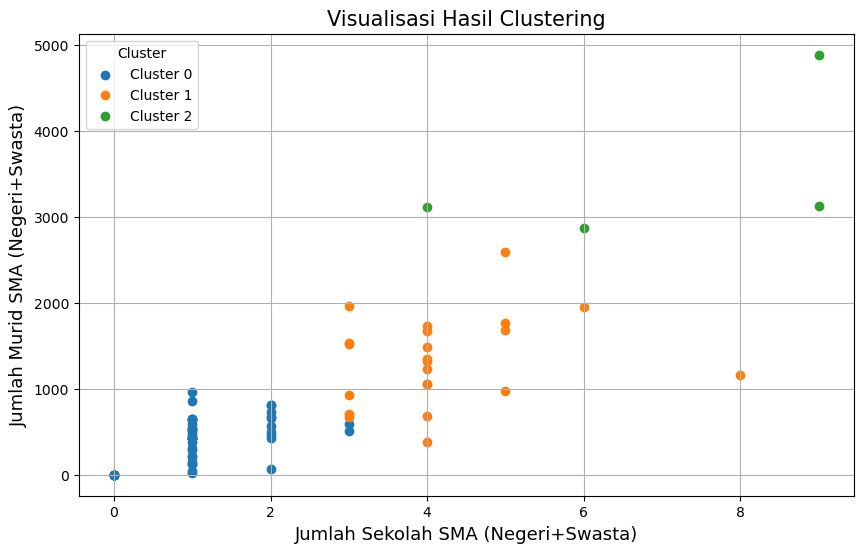

In [25]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
for cluster in data_sma['Cluster'].unique():
    cluster_data = data_sma[data_sma['Cluster'] == cluster]
    plt.scatter(cluster_data['Jumlah Sekolah SMA (Negeri+Swasta)'], 
                cluster_data['Jumlah Murid SMA (Negeri+Swasta)'], 
                label=f'Cluster {cluster}')

plt.title('Visualisasi Hasil Clustering', fontsize=15)
plt.xlabel('Jumlah Sekolah SMA (Negeri+Swasta)', fontsize=13)
plt.ylabel('Jumlah Murid SMA (Negeri+Swasta)', fontsize=13)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## DBSCAN

# Bagian III: Evaluasi dan Analisis Hasil

# Bagian IV: Kesimpulan